<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/MichailSeth_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 5008 - Assignment 1

In this assignment you will be learning about and implementing [Markov Chains](https://en.wikipedia.org/wiki/Markov_chain), if you have never heard  of them before, do not worry, this notebook will explain everything needed for the assignment.

## Markov chains
The best way to introduce what a Markov chain is with a simple example. Suppose you have a simple counter that you can set to any number between 0 and 9 (including 0 and 9). At every step you roll a standard 6 -sided die and depending on whether the rolled number is even or odd you either increment or decrement the counter. If you try to increment at 9, lets say it wraps around to 0 and similarly for trying to decrement at 0. Now you can play this game for multiple steps and record the counter value after every step, this is just a simple markov chain.

Here is an example evolution of the markov chain,
Start with counter at 1.
- Step 1 : Roll a 4, its even so increment the counter to 2.
- Step 2 : Roll a 2, its even so increment the counter to 3.
- Step 3 : Roll a 5, its odd so decrement the counter to 2.

etc.

A markov chain consists of a set of n states (in our example it was the 10 states of the counter) and a probabilistic rule to jump to another state every step (the dice rolls). Although in our simple example we had a similar rule for each state, you can have a different rule for each state. For example you may say that if you the counter is odd, dont roll a die, always increment, and follow the die for even states. The rule is always in the form of n probabilities that sum to one. Each probability indicates the chance that it jumps to that state.

In our example the rule for state 0 can be represented by the below numpy vector

When you are in state 0, you have 50% chance of landing on state 1 (you rolled even) or a 50% chance of landing in state 9 ( you rolled odd and tried to decrement at 0)

In [200]:
import numpy as np
import numpy.random as rnd
np.set_printoptions(precision=4, linewidth=199)
import matplotlib.pyplot as plt
np.array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

The index in the array represents the state and the value represents the probability with which you will jump to that state. Similarly this is the rule for state 4

In [201]:
np.array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

## Transition Matrix

The way to represent markov chains is with a transition matrix $T$ of size (n,n), where the column i will the rule vector for the state i ( Here we are assuming that the states ae numbered 0 to n-1 ).

Thus you can interpret the element $T_{ij}$ of the matrix as the probability you will jump to state i from the state j.

## Question 1

Write a function to return the transition matrix for the following markov chain, given the number of states as an argument.

The rule for the markov chain is as follows,

If current state is i (and if i is not n-1)
1. With probability 0.6, it goes to state i+1
2. With probability 0.1, it will fall back to state i = 0.
2. With probability 0.3, it goes to state i-1 if i is at least 1. If i is instead 0 it stays at state 0.
3. At state n-1, instead of the above operations we stay at state n-1 with probability 1

Intuitively, this markov chain behaves in the following way, at every step there is an 60% chance that it climbs up by 1, a 10% chance that it falls down completely, and a 30% chance it falls down by 1. If it does reach the final state n-1, it stays there forever.

You are **not** allowed to use any for loops for this question, instead use numpy indexing to fill in your matrix. You can assume that n is atleast 4.

Hints:
1. First write your code in an empty cell for with a hardcoded n value, in this way you can quickly iterate and get the right answer first. Then copy it into the function.
2. You can use [Array indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html#index-arrays)

In [202]:
##### YOUR CODE HERE
def transition_matrix(n):#by multipliacation, results in transition (it's a linear transformation, after all)
    mc = np.zeros((n,n))
    m = np.arange(1,n)
    mc[m,m-1] = 0.6
    mc[m-1,m] = 0.3
    mc[0,0] = 0.3
    mc[0,:] += 0.1
    mc[0,n-1] = 0
    mc[n-1,n-1] = 1
    mc[n-2,n-1] = 0
    
    return mc
tm = transition_matrix(10)
print(tm)

[[0.4 0.4 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]
 [0.6 0.  0.3 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.3 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.6 0.  0.3 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.6 0.  0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.6 0.  0.3 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.6 0.  0.3 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.6 0.  0.3 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.6 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.6 1. ]]


To test your function , check that the above returns 
```
array([[0.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 1. ]])
```

In [203]:
#TESTING
transition_matrix(10)

array([[0.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 1. ]])

## Question 2

Now we want to use the transtion matrix to know what are the probabilites of being in each state after running the markov chain for k steps. For example, for the above markov chain, I want to know after 30 steps, what is the probablity that I have reached the state n-1.

Luckily this is fairly easy to calculate, using matrix multiplication. An amazingly useful property of the transition matrix is as follows, if you have vector $p_j$ as the vector of probabilites after step $j$, then $p_{j+1}$ is given by the following matrix vector product.

$$ p_{j+1} =  Tp_j $$

We will not prove this result here, but if you spend some time thinking about what matrix multiplication is doing here, especially interpret it as taking a linear combination of columns then it should make sense.

Thus if someone gave you a probability distribution for the starting state as $p_0$, then the probability distribtion after $k$ steps is simply given by multiplying by the transition matrix k times

$$ p_{k} =  T^{k}p_0 $$

Implement a function which given an initial distribution `p0`, number of steps `k` and a transition matrix `tm`, it will return the distribution after k steps

In [204]:
#YOUR CODE HERE
def propagate(p0,k,tm):
    tmk = np.linalg.matrix_power(tm, k)
    return tmk@p0
    

In [205]:
#TESTING
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(p0,30,tm)
pk

array([0.1603, 0.1301, 0.1056, 0.0855, 0.0695, 0.0555, 0.0445, 0.0328, 0.0205, 0.2957])

The above code should return :

```
array([0.16029774, 0.13006664, 0.10561269, 0.08547506, 0.06947427,
       0.05552321, 0.04450658, 0.03281234, 0.02049648, 0.29573499])
```

## Question 3
### Part a
With this implementation of `propagate`, you can now compute the probability of being in each state of the markov chain after k steps. How many steps does it take for the probability of being in the final state to be at least 0.5?

After each step the probability of being in the final state slowly increases: once we are in state n-1, we never leave. At some point this probability will cross 50%. What you need to calculate is how many steps does it take to cross 50%.

Again use n=10 transition matrix and start from state 0.

Hints:
1. Use the while loop

In [206]:
#YOUR CODE HERE
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = np.zeros(10)
k = 0
while pk[9] < 0.5:
  pk = propagate(p0,k,tm)
  k += 1
print("it takes {} steps for the probablility of being in the final state to exceed 50%".format(k))

it takes 51 steps for the probablility of being in the final state to exceed 50%


### Part b
Convert the above Code into a function that computes the number of steps to 50% probability in the final state given `n` the size of the markov chain

In [207]:
#YOUR CODE HERE
def StepsTO50(n):
  tm = transition_matrix(n)
  p0 = np.zeros(n)
  p0[0] = 1
  pk = np.zeros(n)
  k = 0
  while pk[n-1] < 0.5:
    pk = propagate(p0,k,tm)
    k += 1
  return k

k = StepsTO50(20)
print("it takes {} steps for the probablility of being in the final state to exceed 50% for n = 20".format(k))
k = StepsTO50(30)
print("it takes {} steps for the probablility of being in the final state to exceed 50% for n = 30".format(k))
k = StepsTO50(42)
print("it takes {} steps for the probablility of being in the final state to exceed 50% for n = 42".format(k))


it takes 611 steps for the probablility of being in the final state to exceed 50% for n = 20
it takes 6880 steps for the probablility of being in the final state to exceed 50% for n = 30
it takes 126002 steps for the probablility of being in the final state to exceed 50% for n = 42


### Part c
Compute and plot the number of steps required for $n$ ranging from 10 to 40.

Lookup the plotting function `plt.semilogy`and understand what it does, plot another graph of the number of steps using it.

What does the semilogy plot tell you?

Save the plots as "qsn3c.png" and "qsn3c_semilogy.png"

**Hint:** if your code takes a long time to run, your implementation of `num_steps` may need to be improved. If you  know the distribution after $j$ steps of the markov chain, is there a way to use it to compute the distribution after $j+1$ steps?

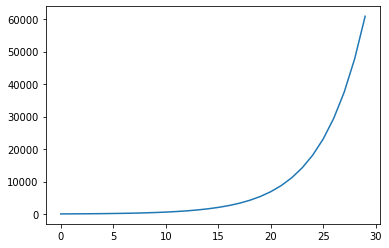

In [208]:
#YOUR CODE HERE
x = np.arange(30)
y = np.zeros(30)
for i in range(30):
  y[i] = StepsTO50(i + 10)
plt.plot(x,y)
plt.savefig("qsn3c.png")

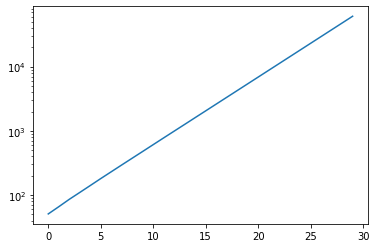

In [209]:

plt.semilogy(x,y)
plt.savefig("qsn3c_semilogy.png")

## Question 4

### Part a
Now we want to also compute some samples from the markov chain. What does this mean? Given a starting state, the Markov chain says that we move to various different states with some probabilities. We want to use randomness to choose what this next state is. Each call to the function will return a different answer, a new sample.

For example consider the markov chain we have been using. It computes the next state by either adding 1 (with probability 0.6), subtracting 1 (probability 0.3), or going back to state 0 (probability 0.1) until it reaches the final state. Once it reaches the final state it stays there forever. If we were starting from state `4` of our Markov chain (for example), then we want to return `5` with probability 0.6, `3` with probability 0.3, and `0` with probability 0.1. 

Write a function `sample` which takes in a transition matrix `tm` and an initial state `s0` and samples a state to move to starting from `s0`. 

In [210]:
#YOUR CODE HERE
def sample(tm, s0):# this is the important function
  """a better name would be transition or newstate, because this returns the new state"""
  if s0 < 0 or s0 > tm.shape[0]-1:
    raise IndexError("Index out of range")
  if s0 == tm.shape[0]-1:
    return s0
  q = abs(1 - np.random.normal(0.0,1.0)) #different q for each transition
  p0 = np.zeros(tm.shape[0])
  p0[s0] = 1.0                   #current state
  trans = tm@p0                  #vector of destination probabilities for each state
  pst = trans.copy()             #for getting middle prob
  max = np.argmax(pst)           #highest prob
  pst[max] = 0.0
  mid = np.argmax(pst)
  pst[mid] = 0.0                 #now there is only one
  min = np.argmax(pst)           #lowest prob, notice 'argmin' is not used, and mid before min
  pst[min] = 0.0

  c0 = np.zeros(tm.shape[0])
  if q <= trans[min]:            #determine which state to actually transition to
    return min
  elif q >= trans[max]:
    return max
  else:
    return mid  
   

In [211]:
def NewTransMat(n):
  """Needs to be done this way to allow different states to have different probabilities"""
  mc = np.zeros((n,n))
  for i in range(1,n-1):
    for j in range(2,n-1):
      if i == j:
        ps = -np.sort(rnd.uniform(0.0,1.0,3))
        ps = ps/np.sum(ps)       #normalize probabilities
        mc[0,j] = ps[0]          #set top row
        mc[i - 1,j] = ps[1]      #set superdiagonal
        mc[i + 1,j] = ps[2]      #set subdiagonal
      
  mc[0,0] = rnd.uniform(low=0.10, high=0.50) #set entrance states
  mc[1,0] = 1 - mc[0,0]
  mc[0,1] = rnd.uniform(low=0.10, high=0.50)
  mc[2,1] = 1 - mc[0,1]
  mc[n-1,n-1] = 1.0#             set final state, not actually needed, but whatever
  return mc

In [212]:
tm = NewTransMat(10)
print(tm)

[[0.1723 0.2354 0.2629 0.2163 0.1759 0.2411 0.1287 0.186  0.0249 0.    ]
 [0.8277 0.     0.2889 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.7646 0.     0.2615 0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.4482 0.     0.1872 0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.5223 0.     0.375  0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.6369 0.     0.2    0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.3838 0.     0.3164 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.6713 0.     0.3358 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.4975 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.6393 1.    ]]


Your implementation should **not** hard-code the probability values from the specific Markov chain we have been working with so far.

### part b

With this implementation of `sample`, write a function `sample_k_steps` which runs a random walk in the chain for `k` steps from an initial state `s0`. The random walk works in the following way: we start from `s0` and sample a new state to move to. We then set that new state to be `s0` and sample a new state to move to from there, repeating this until we have stepped `k` times.

As an example, in the chain we have been working with so far we can only add 1, subtract 1, or go to 0 each time we step until we reach state `n-1`. When we are in state `n-1` we stay there forever. Thus a potential sample of 25 steps in the `n=10` chain is
```
array([0,1,2,1,2,3,0,0,1,2,3,4,5,4,3,4,5,6,7,8,9,9,9,9,9,9])
```
Note that each element of this array is equal to 0, equal to n-1, or is 1 greater or 1 less than the previous one. Further once we have an `n-1` value in our array we have that value for all future elements. 

Write a function `sample_k_steps` which takes in transition matrix `tm`, number of steps `k`, and  starting state `s0` and returns an array of `k+1` states sampled from the chain.

Hint: You can use `sample` from 4a for this

In [213]:
#YOUR CODE HERE
def sample_k_steps(tm,k,s0):
  states = [s0]# the reason there are k+1 states
  c = 0
  while c < k:
    s0 = sample(tm,s0)
    states.append(s0)
    c += 1
  return states

sample_5_steps = sample_k_steps(tm, 5, 3)
print(sample_5_steps)

[3, 0, 0, 1, 2, 0]


In [214]:
print(sample_k_steps(tm, 5, 7))

[7, 8, 7, 8, 7, 6]


Use the below code to test out some of the samples, it samples 20 trajectories of the markov chain and plots them. The plot should show that almost all or all the trajectories would have reached the final state by the end. Save this graph as "qsn4b.png".

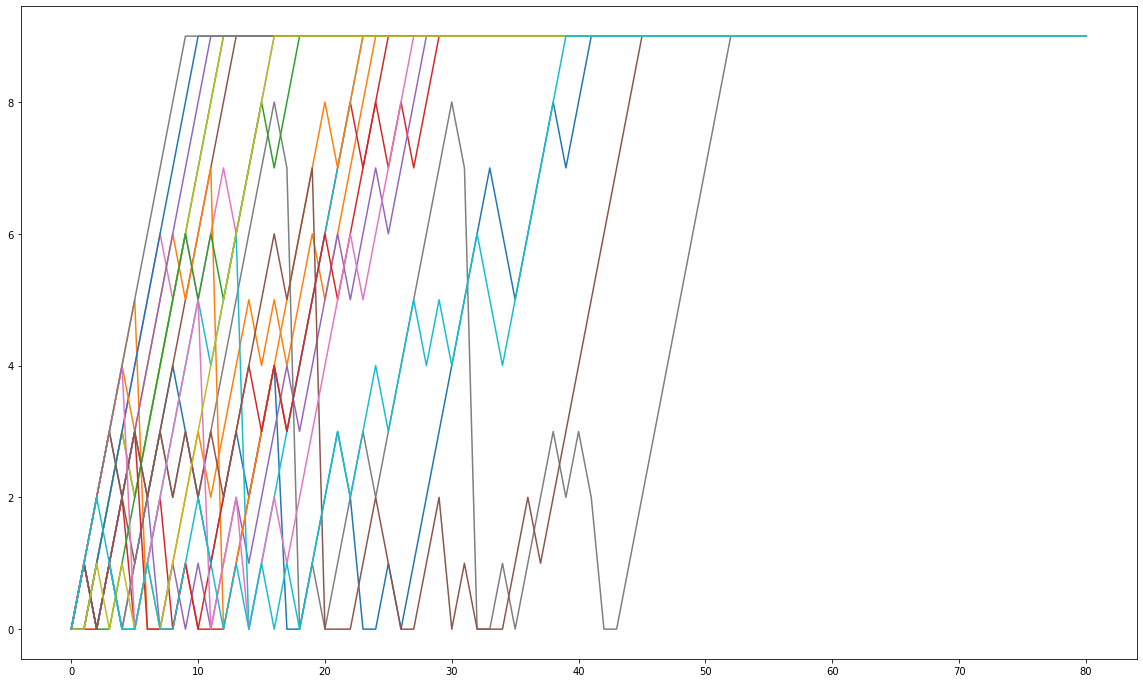

In [215]:
#TESTING
#tm = transition_matrix(10)
tm = NewTransMat(10)
k = 80
s0 = 0
plt.gcf().set_size_inches(20, 12)
for i in range(20):
    states = sample_k_steps(tm, k, s0)
    plt.plot(states)

plt.savefig("qsn4b.png")

## Question 5

We will now use our implementation of `sample` to estimate *hitting times* in a Markov chain. The hitting time between states `i` and `j` is the average number of steps that a random walk starting from state `i` takes to hit state `j`. We will be creating a [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method) to estimate this value: if we run many random walks starting from `i` and count the number of steps it takes them to reach `j`, the average number of steps we observe is (hopefully) a good approximation to the true hitting time.

Write a function `hitting_time_1_walk` which takes in as arguments a transition matrix `tm`, a starting point `i`, and an ending point `j`. Your function should run a random walk starting from `i` until it hits `j`, and return the number of steps that your walk takes to hit `j`.


In [216]:
#YOUR CODE HERE
def hitting_time_1_walk(tm,i,j):
  startwalk = i
  endwalk = j
  numsteps = 0
  current = i
  #while current is not endwalk: this doesn't work
  while current != endwalk: # this does work
    current = sample(tm,current)
    numsteps += 1
    #print('current: {}, i: {}, j: {}'.format(current,i,j))
    if numsteps > 10000:
      break
  return numsteps

walk_len = hitting_time_1_walk(tm,4,2)
print(walk_len)

10001


Note that when applied to our markov chain from before, `hitting_time_1_walk(tm,0,n-1)` runs a random walk starting from `0` until it hits the end state `n-1`. Consequently, we expect that `hitting_time_1_walk(tm,0,n-1)` will be at most some value `k` with probability equal to `propagate(tm,0,k)[n-1]` (take some time to convince yourself of this if you are not sure of this).

1. **Create a new transition matrix `tm` for n = 20**, and create an array of 1000 calls to `hitting_time_1_walk(tm,0,n-1)`. 



In [217]:
n = 20
tm = NewTransMat(n)
ht1w = np.zeros(1000)
for i in range(1000):
  ht1w[i] = hitting_time_1_walk(tm,0,n-1)

2. Write a function `proportion_at_most` which takes in as arguments an array `arr` and a value `max_value`. It should return an array with `max_value` entries, where the `i`'th entry of the output array is the proportion of the values from `arr` which are at most `i`. For example, `proportion_at_most(arr=[1,2,4,2,6], max_value = 7)` should return `[0,0.2,0.6,0.6,0.8,0.8,1,1]` (or the numpy array equivalent to this)




In [218]:
def proportion_at_most(arr, max_value):
  l = len(arr)
  props = np.zeros(max_value + 1)
  for j in range(max_value + 1):
    tot = 0
    for i in range(l):
      if arr[i] <= j:
        tot += 1
    props[j] = tot/l
  return props

test1 = proportion_at_most(arr=[1,2,4,2,6], max_value = 7)
test2 = proportion_at_most(arr=[1,2,4,2,12], max_value = 7)
print(test1)
print(test2)

[0.  0.2 0.6 0.6 0.8 0.8 1.  1. ]
[0.  0.2 0.6 0.6 0.8 0.8 0.8 0.8]


3. Apply this function to the hitting time samples you computed, with `max_value = 2000`.



In [219]:
#how many walk lengths are <= i, for i from 0 to 2000
actual = proportion_at_most(ht1w,2000)
print(actual)

[0. 0. 0. ... 1. 1. 1.]


4. Compute the theoretical probability of being in state `n-1` after `k` steps using `propagate`, for every value of `k` between `0` and `2000`. 



In [220]:
n=20
#tm^k @ p0 from before
#runtot is for comparison to 'proportion_at_most'
runtot = 0
pk = 0
estimated = np.zeros(2000)
estprop = np.zeros(2000)
for k in range(2000):
  p0 = np.zeros(n)
  #initial state
  p0[0] = 1
  #probability of being in the final state after k steps
  pk = propagate(p0,k,tm)
  runtot += pk
  estimated[k] = pk[n-1] 
  estprop[k] = 2*runtot[n-1]/(k*pk[n-1]+1e-8)
print(runtot)

[3.6775e+02 4.6655e+02 4.7216e+02 2.6727e+02 1.7770e+02 9.8052e+01 5.1246e+01 2.3611e+01 1.3153e+01 8.3159e+00 4.7276e+00 2.9159e+00 1.5659e+00 1.0663e+00 6.7177e-01 6.0455e-01 2.8786e-01 1.9930e-01
 7.2764e-02 4.2081e+01]


5. Plot the estimated probabilities from 2) and the true probabilities from 3) against each other. Do they agree?


Save your plot as `qsn5.png`.

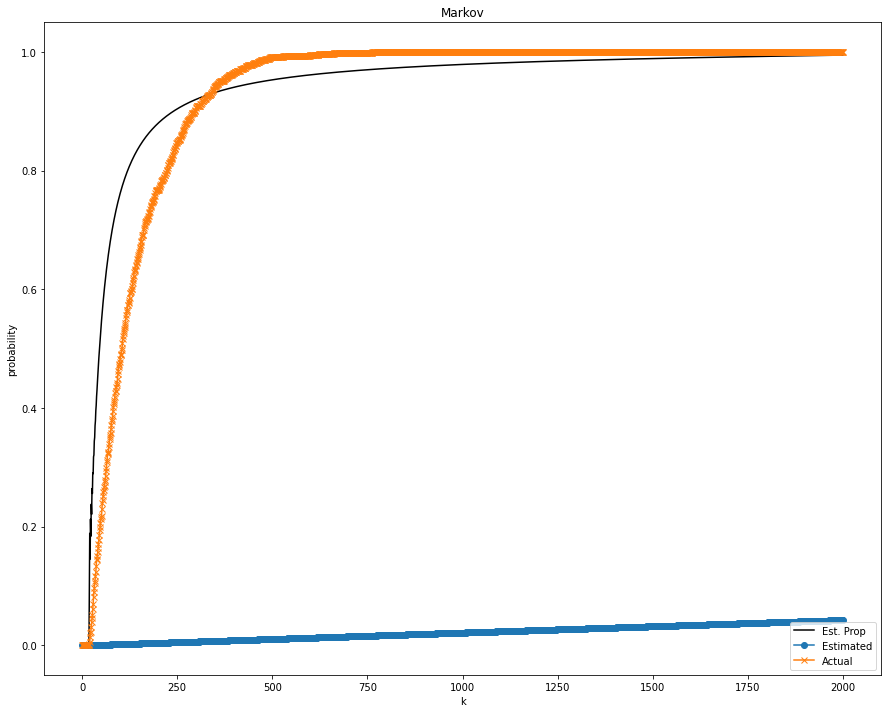

<Figure size 432x288 with 0 Axes>

In [221]:
#no, they don't agree

plt.subplot(1, 1, 1)
plt.title('Markov')
plt.plot(estprop, '-k', label='Est. Prop')
plt.plot(estimated, '-o', label='Estimated')
plt.plot(actual, '-x', label='Actual')
plt.xlabel('k')
plt.ylabel('probability')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()
plt.savefig("qsn5.png")

## Question 6
We will now move away from Markov chains and look towards another use of linear algebra and graphs: clustering algorithms. More specifically, in this exercise we will implement a simple spectral clustering algorithm: we will demonstrate this this algorithm works on a classic synthetic dataset: the 'nested moons' dataset. We will first generate this dataset and identify the ground truth clustering we seek to find. 

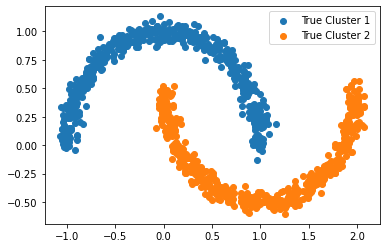

In [222]:
import sklearn.datasets

n = 1000
X,y = sklearn.datasets.make_moons(n,noise=0.05, random_state = 0)

plt.scatter(X[y==0, 0], X[y==0, 1],label="True Cluster 1")
plt.scatter(X[y==1, 0], X[y==1, 1],label="True Cluster 2")
plt.legend()

This dataset consists of $n=1000$ data points in 2-dimensional space. While it seems obvious to our eyes that a good partition of the data exists, many off-the-shelf clustering algorithms fail to fully identify the clusters on this dataset. As an example, here is how the standard K-means clustering algorithm fares on this dataset (we will see more examples of clustering in Lecture 7 when we cover Scikit-learn).

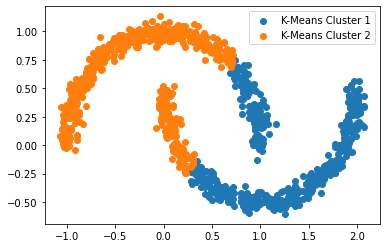

In [223]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
kmeans_labels = model.fit(X).labels_

plt.scatter(X[kmeans_labels==0, 0], X[kmeans_labels==0, 1],label="K-Means Cluster 1")
plt.scatter(X[kmeans_labels==1, 0], X[kmeans_labels==1, 1],label="K-Means Cluster 2")
plt.legend()

### part (a)
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$
In this exercise, we will implement a basic spectral clustering algorithm which will correctly identify the clusters on this dataset. To begin, we will need to form an "affinity matrix": the $(i,j)$ entry of this matrix indicates how close together the $i^{th}$ and $j^{th}$ data points are in space. 

Let $x_i$ denote the $i^{th}$ point in the data set. Form an $n \times n$ matrix $A$ where $A_{ij} = e^{-10 \norm{x_i - x_j}}$ (this constant of $10$ is chosen because it gives good results for this task: it may be tuned in practice). (Here, $\norm{x_i - x_j}$ is the vector $2$-norm of the difference between $x_i$ and $x_j$.) If you did this correctly, the minimum value in $A$ should be `1.679177168057234e-14`.


In [224]:
#YOUR CODE HERE
rt=0.0
A = np.zeros((n,n))
for i in range(X.shape[0]):
  for j in range(X.shape[0]):
    xi = X[i,:]
    xj = X[j,:]
    sq = np.add(xi,-xj)
    rt = np.sqrt(np.sum(np.multiply(sq,sq))) #vector  2 -norm
    A[i,j] = np.exp(-10*rt)

print(np.amin(A))   

1.679177168057234e-14


With this, we generate a [Laplacian matrix](https://www.cs.yale.edu/homes/spielman/561/2012/lect02-12.pdf). We do this in two steps: we first construct a diagonal matrix $D$ which contains the row sums of $A$ on its diagonal, and then we create the Laplacian $L = D- A$.  

In [225]:
D =  np.diag(A.sum(axis=0))
L = D-A
print(L)

[[ 1.2505e+01 -4.4208e-04 -7.4104e-11 ... -6.6363e-09 -3.1045e-09 -3.1999e-08]
 [-4.4208e-04  2.7481e+01 -2.0866e-10 ... -1.2537e-06 -9.9051e-08 -1.1910e-05]
 [-7.4104e-11 -2.0866e-10  2.0675e+01 ... -1.6164e-06 -2.4318e-04 -1.7068e-07]
 ...
 [-6.6363e-09 -1.2537e-06 -1.6164e-06 ...  2.1004e+01 -6.6469e-03 -6.5820e-02]
 [-3.1045e-09 -9.9051e-08 -2.4318e-04 ... -6.6469e-03  2.5449e+01 -6.3616e-04]
 [-3.1999e-08 -1.1910e-05 -1.7068e-07 ... -6.5820e-02 -6.3616e-04  2.6409e+01]]


In [226]:
print(D)

[[13.5047  0.      0.     ...  0.      0.      0.    ]
 [ 0.     28.4807  0.     ...  0.      0.      0.    ]
 [ 0.      0.     21.6753 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ... 22.0041  0.      0.    ]
 [ 0.      0.      0.     ...  0.     26.4486  0.    ]
 [ 0.      0.      0.     ...  0.      0.     27.4089]]


The algorithmic task behind spectral clustering algorithms is to find the eigenvector associated with ***second smallest***  eigenvalue of the matrix $L$. (All eigenvalues of $L$ are positive, and it is a simple exercise to show that the all-ones vector is an eigenvector of $L$ with eigenvalue $0.$) As we will later see, the entries of this vector will enable us to identify the partition in our original dataset. We will build up to this functionality in stages. 

We begin by writing a linear system solver for the matrix $L$. We will use an adaptation of [Richardson iteration](https://en.wikipedia.org/wiki/Modified_Richardson_iteration) to do this task: the pseudocode for this is given below. 

```
    input) L: an n x n Laplacian matrix, b: an n x 1 vector with entries summing to 0, T: number of iterations
    outputs) x: n x 1 vector approximately satisfying Lx =b.

    x <- all-zeros vector
    steplength = 0.03
    for i = 0,1,2,...,T-1:
        residual <- b - L*x
        x <- x + steplength*residual
```

Write a function `richardson(L,b,T=500)` which implements the algorithm given above. (Note that the `steplength` parameter of $0.03$ may be optimized slightly, but this value gives good performance for solving linear systems in the Laplacian defined earlier.)

In [227]:
# because 'b: an n x 1 vector with entries summing to 0' in the pseudo code
b = np.random.normal(0,1,1000) 
print('average before:{}, sum before:{}'.format(np.average(b),np.sum(b)))
b -= np.average(b)
b[np.argmax(b)] -= np.sum(b)
print('average after:{}, sum after:{}'.format(np.average(b),np.sum(b)))

average before:0.06931873779334781, sum before:69.31873779334781
average after:0.0, sum after:0.0


In [228]:
#YOUR CODE HERE
def richardson(L,b,T=500): #in our later code, we will run for T = 500 iterations
    x = np.zeros_like(b)
    hist = []
    steplength = 0.03
    for i in range(T):
      residual = b - np.dot(L,x)
      x = x + steplength * residual
      #yield abs(np.add(np.dot(L,x), -b))
      hist.append(np.sum(abs(np.add(np.dot(L,x), -b))))
    hist = np.asarray(hist)
    return x, hist
#get the approximation
xvec, _ = richardson(L,b)
#if we subtract b from both sides, we expect zero, or close to it
print(np.sum(np.add(np.dot(L,xvec), -b)))

-4.3711562147663585e-14


### part (b)

While the Richardson iteration above works well on small problems, it converges slowly on larger instances. This is especially true for our Laplacian linear system: the norm of our residual error may remain higher than $10^{-4}$ even after 1000 iterations. To address this issue, we will implement a version of [Nesterov acceleration](https://calculus.subwiki.org/wiki/Nesterov%27s_gradient_acceleration) to improve the convergence of this procedure. The pseudocode for this algorithm is given below: 


```
    input) L: an n x n Laplacian matrix, b: an n x 1 vector with entries summing to 0, tol: error tolerance
    outputs) x_T: n x 1 vector approximately satisfying Lx =b.

    x_0, y_0 <- all-zeros vector
    steplength = 0.03
    alpha = 0.9
    for i = 0, 1, ... T-1:
        x_{i+1} <- y_i + steplength*(b - L*y_i)
        y_{i+1} = x_{i+1} + alpha*(x_{i+1} - x_i)
        i = i + 1
```


Here the index $i$ denotes the index of iteration: $y_1$ is a different $n$-dimensional vector to $y_0$ (and likewise with $x$). It does not indicate It may be helpful to un-roll the for loop to see the vectors it defines: if $\eta$ is the steplength, we see

\begin{align*}
x_1 = y_0 + \eta(b- L y_0) \\
y_1 = x_1 + \alpha (x_1 - x_0) \\
x_2 = y_1 + \eta (b- L y_1) \\
y_2 = x_2 + \alpha (x_2 - x_1) \\
x_3 = y_2 + \eta (b- L y_2) \\
y_3 = x_3 + \alpha (x_3 - x_2)
\end{align*}

and so on. We see that the vector $x_1$ defined on the first line is used to define both $y_1$ on the second line and $y_2$ on the fourth line. You should think of the algorithm as constructing two sequences of vectors $x_i$ and $y_i$: each $x$ vector is a function of the previous $y$ vector, but each $y$ vector is a function of the previous **two** $x$ vectors. You may find it helpful to store two different $x$ vectors (called $x_{current}$ and $x_{old}$ for example) to implement the algorithm.

(For those interested in the justification of this procedure, solving the linear equations $Lx = b$ is equivalent to finding the minimizing $x$ for the quadratic $\frac{1}{2} x^\top L x - b^\top x$. In the pseudocode, we apply the Nesterov accelerated gradient method to this problem. The constants of `alpha` and `steplength` can again be slightly improved, but these give good performance for our Laplacian)

Write a function `agd(L,b,T=500)` to implement the above pseudocode. 

In [229]:
#YOUR CODE HERE
def agd(L,b,T=500):
    ys = [np.zeros_like(b)]
    xs = [np.zeros_like(b)]
    hist = []
    steplength = 0.03
    alpha = 0.9
    for i in range(T):
        tx = steplength * (b - np.dot(L , ys[i]) )
        xs.append(np.add(ys[i], tx))
        ty = alpha * np.add(xs[i+1], -xs[i])# xs[i] is old x vector, xs[i + 1] is new x vector
        ys.append(np.add(xs[i+1], ty) )
        #yield abs(np.add(np.dot(L,xs[i+1]), -b))
        hist.append(np.sum(abs(np.add(np.dot(L,xs[i+1]), -b))))
        i = i + 1
    hist = np.asarray(hist)
    #print(xs[-1].shape)
    return xs, ys, hist
        
nest, _, h = agd(L,b)
print(np.sum(np.add(np.dot(L,nest[-1]), -b)))

-3.5648567431323386e-15


In [230]:
#TESTING-- try using Richardson and AGD to solve the linear system Lx = v
np.random.seed(0)
v = np.random.rand(n)
v -= np.sum(v)/n
'''
should be v = v - np.average(v)
then v[np.argmax(v)] -= np.sum(v)
which will ensure the vector components sum
to zero
'''
x, rich_hist = richardson(L,v,T=100)
x, y, nest_hist = agd(L,v,T=100)

If you did this correctly, you will see that the Nesterov acceleration method converges dramatically faster than Richardson iteration. 

We will now try to quantify this effect. Modify your implementations of `richardson` and `agd` to additionally return an array containing $\norm{L x_i - b}$ for each $x_i$ encountered during the while loop of the algorithm. Compare these on a semilogy plot, and label your curves appropriately. Save the figure as `qsn6b.png`. 

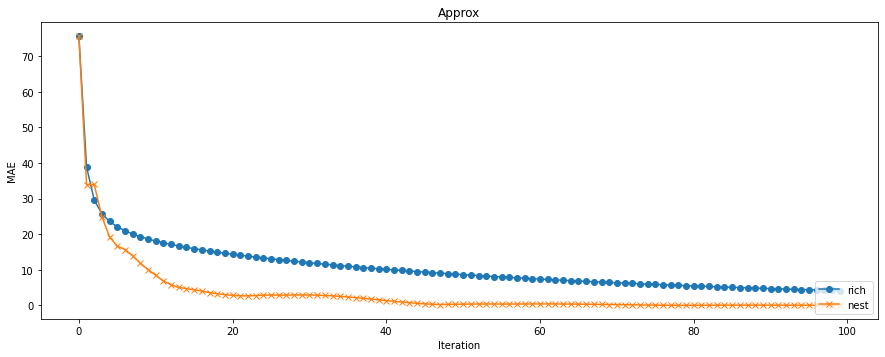

<Figure size 432x288 with 0 Axes>

In [231]:
#YOUR CODE HERE

plt.subplot(2, 1, 2)
plt.title('Approx')
plt.plot(rich_hist, '-o', label='rich')
plt.plot(nest_hist, '-x', label='nest')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()
plt.savefig("qsn6b.png")

### part (c)


We are finally ready to apply our linear system solver to spectral clustering. We do this via a modification of the power method from Lecture 4. We provide the pseudocode for this method below:

```
    input) L: an n x n Laplacian matrix, iters: number of iterations
    outputs) l: the second-smallest eigenvalue of L
             v: the corresponding eigenvector

    v <- random vector of length n
    v <-  v - sum(v)/n 
    #this ensures v is orthogonal to the all-ones vector (the smallest eigenvalue of L) 
    for i = 0,1,2...iters-1: 
        v <- x solving the equation L*x = v
        v <-  v - sum(v)/n 
        #this ensures v is orthogonal to the all-ones vector (the smallest eigenvalue of L) 
        v <- v / ||v||_2
        l <- v^T L v
```

Here, `||v||_2` denotes the vector $2$-norm (there is a function in numpy to compute this). Write a function `pow_method(L,iters=20)` which implements the above pseudocode and solves the linear systems using your `agd` implementation from part (b). 

In [232]:
def pow_method(L,iters=20):
    pow_hist = []
    v = np.random.rand(n)
    v -= np.sum(v)/n 
    #this ensures v is orthogonal to the all-ones vector (the smallest eigenvalue of L) 
    v[np.argmax(v)] -= np.sum(v)   
    v,x,z = agd(L,v,T=iters)#needed to get the right data structure and type
    for i in range(iters): 
        v,x,z = agd(L,v[-1],T=iters)
        #this ensures v is orthogonal to the all-ones vector (the smallest eigenvalue of L) 
        v[-1] = v[-1] / np.linalg.norm(v[-1],ord=2)
        l = v[-1].T @ (L @ v[-1])
        pow_hist.append(l)      
    return l, v[-1], pow_hist

l, v, h = pow_method(L)
print(l)

0.11381832962481372


For the matrix $L$ in the problem, the eigenvalue you obtain should be between $0.1$ and $0.2$. 

We are finally ready to implement spectral clustering. To do this, use the function `np.argsort` to identify the indices of the largest $500$ entries from $v$. These will (hopefully) correspond to the elements of one of the clusters in our dataset. Additionally, compute the indices of the smallest $500$ entries of $v$: these will give the datapoints belonging to the other cluster. 

Modify the plotting code from the K-means example from earlier to display the computed spectral clusters of our input data. Label your plot appropriately, and save the figure as `qsn6c.png`.

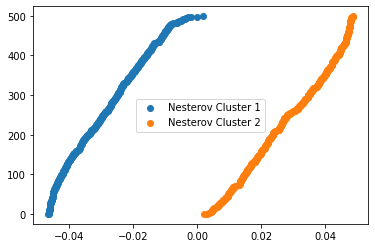

In [234]:
#YOUR CODE HERE
XX = np.argsort(v)
y = np.arange(0, 500)
XY = v[XX[0:500]]
XZ = v[XX[500:1000]]
plt.scatter(XY, y, label="Nesterov Cluster 1")
plt.scatter(XZ, y, label="Nesterov Cluster 2")     
plt.legend()
plt.savefig("qsn6c.png")

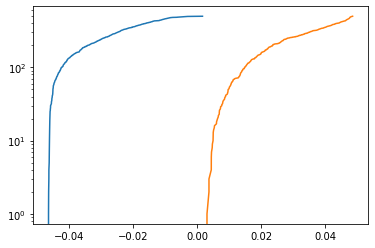

In [235]:
plt.semilogy(XY,y,XZ,y)

# Submission Instructions

You need to submit the following in canvas
1. This notebook with the code filled in for each question
2. The figures
    1. qsn3.png
    2. qsn4c.png and qsn4c_semilogy.png
    3. qsn5.png
    4. qsn6b.png
    5. qsn6c.png